![](./resource/RNN.png)

은닉층에서 다시 입력으로 돌아오는 순환 구조이다.   
RNN은 순환구조를 통해 과거의 데이터를 기억해 두고 있다가 새로운 입력 데이터와 과거 데이터를 연결시켜 의미를 알아낸다. 

 ## Simple RNN
 ![](./resource/simpleRnn.png)

 - input data = [X_t-1, X_t, X_t+1]
 - hidden layer(RNN레이어 출력값) = [H_t-1, H_t, H_t+1]
 - output = [Y_t-1, Y_t, Y_t+1]
 
 - W_ih: input, hidden사이의 가중치
 - W_hh: hidden, hidden사이의 가중치
 - W_ho: hidden, output사이의 가중치

 시간 t에서의 출력 H_t = tanh(X_t * W_ih + H_t-1 * W_hh)

## 시계열 데이터 기반의 SimpleRNN

- w: window size: 이전 데이터 몇 개를 묶을 것인가
- h: horizon factor: 얼마나 먼 미래의 값을 예측할 것인가

![](./resource/timeseries_rnn.png)

w=3, h=1일 때 3개를 묶어서 data로 쓰고 1개 앞의 값인 11을 label로 사용한다. 

```python
tf.keras.layers.SimpleRNN(units=10, actiation='tanh', input_shape=(3,1))
```
- units: simpleRNN layer 내의 노드 개수가 10개이다.  
- input_shape: 3: time-step 데이터를 이용해서 정답을 3개 만듬 / 1: layer로 한개의 데이터가 입력된다.


## RNN 학습 데이터 생성
RNN layer 입력 데이터는 (batch size, time step, input dims)
- batch size: window size로 분리되어 있는 데이터의 총 개수
- time steps: 몇 개의 데이터를 이용해서 lable을 만들어 낼지를 나타내며 window size 크기와 동일
- input dims: RNN layer로 한번에 드가는 데이터의 개수

ex) [1,2,3,4,5,6] / w=3, h=1 일 때, 
입력 데이터의 shape은 (2,3,1)텐서로 나타내야 한다. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras import Sequential

In [4]:
x = np.arange(0, 100, 0.1)
y = 0.5*np.sin(2*x) - np.cos(x/2.0)

seq_data = y.reshape(-1, 1)

print(seq_data.shape, seq_data[:5])

(1000, 1) [[-1.        ]
 [-0.89941559]
 [-0.80029499]
 [-0.70644984]
 [-0.62138853]]


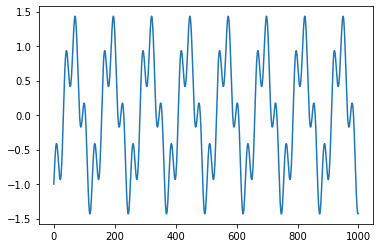

In [5]:
plt.plot(seq_data)